<a href="https://colab.research.google.com/github/paubereon/proyecto_cienciadatos/blob/main/Copia_de_Avanzada_Cuaderno_7_CNN_Redes_Neuronales_Convolucionales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cuaderno 7. Convolutional Neuronal Network (CNN)

Adaptado de: https://www.tensorflow.org/tutorials/images/cnn

Las Redes Neuronales Convolucionales (CNN, por sus siglas en inglés) son un tipo especializado de redes neuronales artificiales, diseñadas principalmente para procesar datos con estructura de cuadrícula, como las imágenes.

A diferencia de las redes neuronales tradicionales vista en la unidad anterior (perceptrón multicapa), que operan en un modo completamente conectado, las CNN se inspiran en la forma en que el cerebro humano procesa las imágenes, utilizando capas convolucionales que permiten detectar características locales, como bordes, esquinas y patrones simples, a diferentes escalas.


Las CNN son fundamentales para tareas de visión por computadora debido a su capacidad para aprender representaciones jerárquicas y detectar patrones espaciales a través de múltiples capas.

![imagen](https://images.datacamp.com/image/upload/v1700043905/image10_f8b261ebf1.png)

#Uso de las CNN

Las Redes Convolucionales se utilizan ampliamente en una variedad de aplicaciones, entre las que se incluyen:

**Clasificación de imágenes:** Identificación de objetos, personas o escenas dentro de una imagen.

**Reconocimiento de rostros:** Identificación o verificación de una persona a partir de una imagen facial.

**Detección de objetos:** Localización y clasificación de múltiples objetos dentro de una imagen.

**Segmentación de imágenes:** Asignación de una etiqueta o clase a cada píxel de una imagen.

**Reconocimiento de texto y escritura:** Extracción de texto de imágenes, como en el caso de OCR (Reconocimiento Óptico de Caracteres).

**Reconocimiento de patrones:** En datos visuales como la lectura de señales o identificación de patrones en imágenes médicas (como en radiografías).


#Componentes esenciales de una CNN

Una CNN se compone de varias capas que cumplen funciones específicas para aprender características jerárquicas de los datos de entrada:

**Capa de Convolución:** Esta capa es el corazón de las CNN. Aplica filtros (kernels) sobre la imagen de entrada para extraer características locales, como bordes y texturas. Los filtros se entrenan durante el proceso de aprendizaje.

**Capa de Activación (ReLU):** La función de activación más comúnmente utilizada en CNN es la función ReLU (Rectified Linear Unit). Esta función agrega no linealidad al modelo, permitiendo que la red aprenda representaciones complejas.

**Capa de Pooling:** Esta capa se encarga de reducir la resolución espacial de la representación de la imagen, con el fin de disminuir la cantidad de parámetros y cálculos.

Comúnmente se utiliza el **MaxPooling**, que selecciona el valor máximo de un área de la imagen, preservando las características más importantes.

**Capa completamente conectada (Fully Connected, FC):** Después de pasar por las capas de convolución y pooling, las representaciones de las imágenes se pasan a una o varias capas completamente conectadas, que tienen la tarea de clasificar o realizar predicciones.

**Capa de salida:** Dependiendo de la tarea, la capa de salida puede tener una activación softmax (para clasificación) o sigmoide (para tareas binarias), produciendo la probabilidad de cada clase o etiqueta.


# Utilidades de Keras y TensorFlow para Visión por Computadora

## 1. Cargar y Preprocesar Imágenes

- **`tensorflow.keras.preprocessing.image.load_img`**: Carga imágenes desde un archivo y opcionalmente las redimensiona.

  ```python
  from tensorflow.keras.preprocessing import image
  img = image.load_img('path_to_image.jpg', target_size=(224, 224))
```

`tensorflow.keras.preprocessing.image.img_to_array:` Convierte una imagen cargada en un arreglo NumPy.




  ```python
  img_array = image.img_to_array(img)
  tensorflow.keras.preprocessing.image.array_to_img: Convierte un arreglo NumPy de vuelta a una imagen.
  ```

  ```python
  img_back = image.array_to_img(img_array)
  ```
  
`tensorflow.image.resize:` Redimensiona una imagen con TensorFlow.

  ```python
  resized_image = tf.image.resize(image, [224, 224])
  ```

`tf.io.read_file:` Lee un archivo de imagen desde el disco.

  ```python
  image_data = tf.io.read_file('path_to_image.jpg')
  ```

`tf.image.decode_jpeg:` Decodifica imágenes JPEG en un tensor.

  ```python
  image = tf.image.decode_jpeg(image_data, channels=3)
  ```

`tf.image.per_image_standardization:` Normaliza una imagen individual para que su media sea 0 y su desviación estándar sea 1.

  ```python
  standardized_image = tf.image.per_image_standardization(image)
  ```

## 2. Aumentación de Imágenes (Image Augmentation)

`tensorflow.keras.preprocessing.image.ImageDataGenerator:` Genera imágenes de entrenamiento aumentadas en tiempo real.

  ```python
  from tensorflow.keras.preprocessing.image import ImageDataGenerator
  ```

  ```python  
    datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
  )
    ```

  ```python
  augmented_images = datagen.flow(x_train, y_train)
  ```

`tf.image.random_flip_left_right:` Realiza una volteo aleatorio horizontal de una imagen.

  ```python
  flipped_image = tf.image.random_flip_left_right(image)
  ```
`tf.image.random_flip_up_down:` Realiza una volteo aleatorio vertical de una imagen.

  ```python
  flipped_image = tf.image.random_flip_up_down(image)
  ```
`tf.image.random_brightness:` Ajusta aleatoriamente el brillo de una imagen.

  ```python
  bright_image = tf.image.random_brightness(image, max_delta=0.2)
  ```

`tf.image.random_contrast:` Ajusta aleatoriamente el contraste de la imagen.

  ```python
  contrast_image = tf.image.random_contrast(image, lower=0.2, upper=0.8)
  ```

`tf.image.random_rotation:` Gira una imagen aleatoriamente en un rango específico (aunque no está en la API oficial de TensorFlow, es posible usar transformaciones personalizadas).


## 3. Cargar y Preprocesar Conjuntos de Datos

`tf.data.Dataset:` Utiliza esta clase para cargar y manipular grandes conjuntos de datos de imágenes de manera eficiente.

  ```python
  image_paths = ['image1.jpg', 'image2.jpg']
  dataset = tf.data.Dataset.from_tensor_slices(image_paths)
  dataset = dataset.map(process_image_function)
  dataset = dataset.batch(32)

  tensorflow.keras.preprocessing.image
  ```

`ImageDataGenerator.flow_from_directory:` Carga imágenes desde directorios estructurados para tareas de clasificación.

  ```python
  train_generator = datagen.flow_from_directory(
    'data/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
  ```

`tf.data.Dataset.from_tensor_slices:` Utiliza esta función para crear un objeto Dataset a partir de arrays de NumPy o listas de Python.

  ```python
  dataset = tf.data.Dataset.from_tensor_slices((image_array, label_array))
  ```

##4. Segmentación de Imágenes

`tf.keras.layers.Conv2D:` Utilizado para realizar convoluciones en imágenes. Fundamental en modelos de segmentación.

  ```python
  conv_layer = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')
  ```

`tf.keras.layers.UpSampling2D:` Se utiliza para la expansión espacial de una imagen, útil en redes de segmentación como U-Net.


  ```python
  upsample_layer = tf.keras.layers.UpSampling2D(size=(2, 2))

  ```

`Redes de Segmentación como U-Net:` Keras facilita la implementación de arquitecturas de segmentación, como la U-Net, que combina convoluciones y upsampling para segmentar imágenes a nivel de píxel.

##5. Modelos Preentrenados y Transfer Learning

`tensorflow.keras.applications:` Keras incluye modelos preentrenados como VGG16, ResNet, InceptionV3, y MobileNet, que se pueden usar para clasificación o como base para la segmentación.

  ```python
  from tensorflow.keras.applications import VGG16
  base_model = VGG16(weights='imagenet',
  include_top=False, input_shape=(224, 224, 3))
  ```

`tensorflow.keras.Model:` Puedes modificar estos modelos preentrenados agregando capas adicionales para personalizarlos para tus necesidades.

  ```python
  model = tf.keras.Model(inputs=base_model.input, outputs=x)
  ```

##6. Herramientas para Visualización y Debugging

`matplotlib.pyplot:` Visualización de imágenes y resultados de modelos.

  ```python
  import matplotlib.pyplot as plt
  plt.imshow(image_array)
  plt.show()
  ```

`tensorboard:` Herramienta para visualizar métricas de entrenamiento, imágenes y gráficos de modelos.

  ```python
  from tensorflow.keras.callbacks import TensorBoard
  tensorboard_callback = TensorBoard(log_dir='./logs')
  ```

##7. Normalización y Estándarización

`tf.image.per_image_standardization:` Normaliza una imagen individual.

  ```python
  standardized_image = tf.image.per_image_standardization(image)
  ```

`tf.keras.layers.BatchNormalization:` Normalización de lotes que ajusta y centra las activaciones de cada capa.

  ```python
  batch_norm_layer = tf.keras.layers.BatchNormalization()
  ```

8. Detección de Objetos

`tf.image.draw_bounding_boxes:` Dibuja cuadros delimitadores sobre una imagen.

  ```python
  image_with_boxes = tf.image.draw_bounding_boxes(image, boxes)
  ```

##9. Tareas de Clasificación y Regresión

`tf.keras.layers.Dense:` Capa densa (totalmente conectada) utilizada para la clasificación final.

  ```python
  dense_layer = tf.keras.layers.Dense(10, activation='softmax')
  ```

`tf.keras.layers.GlobalAveragePooling2D:` Reduce las dimensiones espaciales de una imagen, muy útil para transfer learning.

  ```python
  global_pool_layer = tf.keras.layers.GlobalAveragePooling2D()
  ```

#Introducción al Taller

En este taller, vamos a construir una red neuronal convolucional (CNN) utilizando TensorFlow y Keras para clasificar imágenes en el conjunto de datos CIFAR-10. Este conjunto de datos contiene imágenes de 10 categorías diferentes, como aviones, automóviles, gatos, perros, entre otras. A lo largo de este ejercicio, aprenderás a:

1. Preprocesar imágenes y dividir los datos en entrenamiento y prueba.

2. Construir y entrenar una red neuronal convolucional.

3. Evaluar el desempeño del modelo utilizando métricas estándar como precisión.

4. Visualizar los resultados de entrenamiento y realizar ajustes de hiperparámetros.

Este ejercicio es fundamental para adquirir experiencia práctica en visión por computadora y redes neuronales, dos de los campos más relevantes dentro del aprendizaje profundo.



#Importación de Librerías

En esta celda se importan las librerías necesarias para trabajar con redes neuronales en TensorFlow y Keras, así como para visualizar las imágenes con Matplotlib.

**Recomendación:** ir a Entorno de ejecución/Cambiar tipo de entorno de ejecución/T4 (GPU)

In [ ]:
# Importar TensorFlow
import tensorflow as tf

# Importar componentes de Keras para crear y entrenar el modelo
from tensorflow.keras import datasets, layers, models

# Importar Matplotlib para visualizar las imágenes
import matplotlib.pyplot as plt


#Carga y Preprocesamiento de Datos CIFAR-10


Descripción: En esta celda, cargamos el conjunto de datos CIFAR-10, que consta de 60,000 imágenes de 32x32 píxeles divididas en 10 categorías. Luego normalizamos los valores de los píxeles de las imágenes para que estén en el rango de [0, 1] dividiendo por 255.0.

In [ ]:
# Cargar el conjunto de datos CIFAR-10 desde Keras
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizar los valores de los píxeles para que estén en el rango [0, 1]
# Esto se hace dividiendo entre 255.0, ya que los valores de píxel originales están en el rango [0, 255]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Verificar las dimensiones de los datos cargados
print("Forma de las imágenes de entrenamiento:", train_images.shape)
print("Forma de las etiquetas de entrenamiento:", train_labels.shape)
print("Forma de las imágenes de prueba:", test_images.shape)
print("Forma de las etiquetas de prueba:", test_labels.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
Forma de las imágenes de entrenamiento: (50000, 32, 32, 3)
Forma de las etiquetas de entrenamiento: (50000, 1)
Forma de las imágenes de prueba: (10000, 32, 32, 3)
Forma de las etiquetas de prueba: (10000, 1)


#Obtener el tamaño de la imagen
Este código imprimirá el tamaño de la imagen en formato (alto, ancho, canales). Por ejemplo, para CIFAR-10, las imágenes tienen un tamaño de 32x32 píxeles y 3 canales de color (RGB), por lo que el resultado sería (32, 32, 3).

In [ ]:
# Obtener las dimensiones de la primera imagen del conjunto de entrenamiento
image_shape = train_images[1].shape
print("Dimensiones de la imagen:", image_shape)


Dimensiones de la imagen: (32, 32, 3)


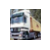

In [ ]:
import matplotlib.pyplot as plt

# Mostrar la imagen en su tamaño original
plt.figure(figsize=(0.4, 0.4))  # Ajustar el tamaño de la figura para que se vea más grande
plt.imshow(train_images[1])  # Mostrar la primera imagen del conjunto de entrenamiento
plt.axis('off')  # Desactivar los ejes
plt.show()

### Visualización de Imágenes del Conjunto de Entrenamiento

En esta celda, mostramos un conjunto de 25 imágenes del conjunto de entrenamiento CIFAR-10. Además, se etiquetan las imágenes con las clases correspondientes para verificar que los datos están bien organizados.


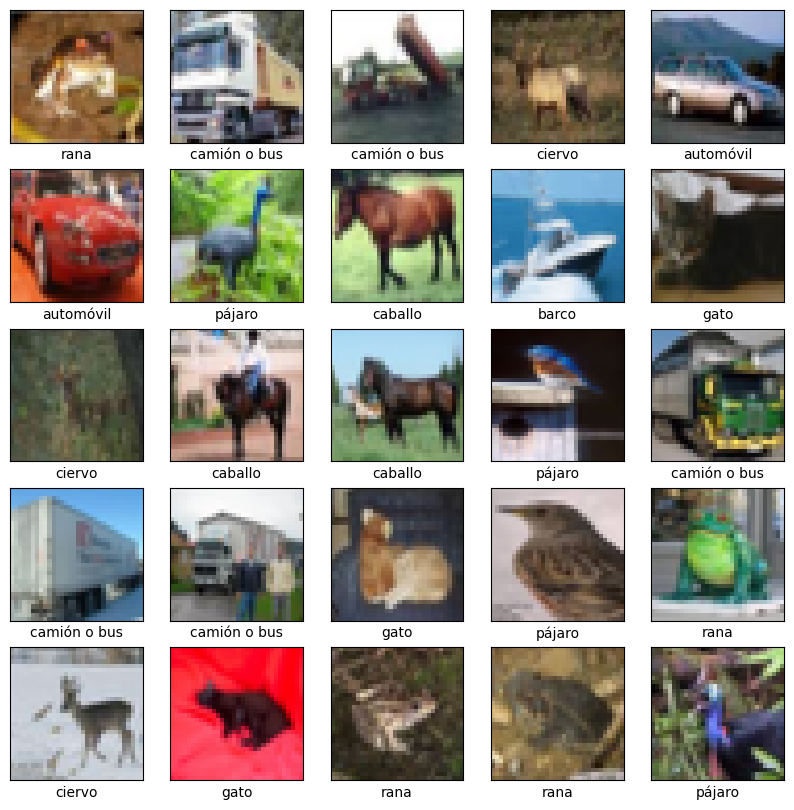

In [ ]:
# Definir las clases del conjunto de datos CIFAR-10 en español
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo',
               'perro', 'rana', 'caballo', 'barco', 'camión o bus']

# Crear una figura para mostrar las imágenes
plt.figure(figsize=(10, 10))

# Mostrar las primeras 25 imágenes del conjunto de entrenamiento
for i in range(25):
    # Crear una subgráfica para cada imagen
    plt.subplot(5, 5, i + 1)

    # Desactivar los ticks en los ejes X e Y
    plt.xticks([])
    plt.yticks([])

    # Desactivar la cuadrícula
    plt.grid(False)

    # Mostrar la imagen
    plt.imshow(train_images[i])

    # Etiquetar la imagen con el nombre de la clase correspondiente
    # Los labels de CIFAR-10 son arreglos, por lo que usamos un índice extra
    plt.xlabel(class_names[train_labels[i][0]])

# Mostrar las imágenes
plt.show()


#Construcción de la Red Neuronal Convolucional (CNN)

En esta celda, construimos un modelo básico de red neuronal convolucional (CNN) utilizando Keras. El modelo tiene tres capas convolucionales seguidas de capas de max pooling. Se utiliza la función de activación ReLU para las capas convolucionales.

In [ ]:
from tensorflow.keras import layers, models

# Crear un modelo secuencial de Keras
model = models.Sequential()

# Usar la capa Input para definir la forma de entrada
model.add(layers.Input(shape=(32, 32, 3)))

# Primera capa convolucional: 32 filtros de tamaño 3x3, función de activación ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Primera capa de max pooling: reduce la dimensionalidad a la mitad, tomando el valor máximo de cada bloque 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Segunda capa convolucional: 64 filtros de tamaño 3x3, función de activación ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Segunda capa de max pooling: reduce nuevamente la dimensionalidad
model.add(layers.MaxPooling2D((2, 2)))

# Tercera capa convolucional: 64 filtros de tamaño 3x3, función de activación ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


Revisamos la arquitectura de lared neuronal

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

Se puede ver que la salida de cada capa Conv2D y MaxPooling2D es un tensor 3D con la forma (altura, anchura, canales). Las dimensiones de altura y anchura tienden a disminuir a medida que avanzamos más profundamente en la red. El número de canales de salida de cada capa Conv2D está controlado por el primer argumento (por ejemplo, 32 o 64). Típicamente, a medida que las dimensiones de anchura y altura se reducen, podemos permitirnos (desde el punto de vista computacional) agregar más canales de salida en cada capa Conv2D.



#Añadir Capas Densas y Capa de Salida

En esta celda, añadimos la capa Flatten para aplanar la salida de las capas convolucionales y de pooling, seguida de capas densas para realizar la clasificación final. La última capa es una capa densa con 10 neuronas, que corresponde a las 10 clases de CIFAR-10. No se aplica función de activación en la capa de salida porque utilizaremos sparse_categorical_crossentropy como función de pérdida en la fase de entrenamiento.




In [ ]:
# Añadir la capa Flatten para aplanar las salidas de las capas convolucionales
model.add(layers.Flatten())

# Capa densa con 64 neuronas y activación ReLU
model.add(layers.Dense(64, activation='relu'))

# Capa de salida con 10 neuronas (una por cada clase en CIFAR-10)
# No usamos activación en la capa de salida ya que utilizaremos 'sparse_categorical_crossentropy' como función de pérdida
model.add(layers.Dense(10))


Arquitectura final

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Las salidas de las convoluciones de tamaño (4, 4, 64) fueron aplanadas en la capa Flaten en vectores de forma (1024) y luego pasa por dos capas densas. Ver el esquema sguiente:

![image](https://github.com/adiacla/bigdata/blob/master/CNN.png?raw=true)

#Compilación y Entrenamiento del Modelo

En esta celda, compilamos el modelo utilizando el optimizador Adam y la función de pérdida `SparseCategoricalCrossentropy` para la clasificación multiclase. Luego, entrenamos el modelo durante 10 épocas utilizando los datos de entrenamiento y validación.

In [ ]:
# Compilamos el modelo utilizando el optimizador 'adam' y la función de pérdida 'SparseCategoricalCrossentropy'
# 'from_logits=True' indica que las salidas del modelo no son probabilidades (es decir, son logits)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrenamos el modelo durante 10 épocas usando los datos de entrenamiento y validación
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(test_images, test_labels))


Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.3498 - loss: 1.7513 - val_accuracy: 0.5176 - val_loss: 1.3730
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5661 - loss: 1.2149 - val_accuracy: 0.6246 - val_loss: 1.0644
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6430 - loss: 1.0174 - val_accuracy: 0.6454 - val_loss: 1.0164
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6797 - loss: 0.9017 - val_accuracy: 0.6870 - val_loss: 0.9094
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7103 - loss: 0.8286 - val_accuracy: 0.7005 - val_loss: 0.8769
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7347 - loss: 0.7551 - val_accuracy: 0.6995 - val_loss: 0.8740
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7497 - loss: 0.7096 - val_accuracy: 0.7022 - val_loss: 0.8649
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7610 - loss: 0.681

#Visualización del Entrenamiento y Evaluación del Modelo

En esta celda, visualizamos cómo cambian la precisión del modelo durante el entrenamiento y la validación a lo largo de las épocas. También evaluamos el modelo en el conjunto de prueba para obtener la pérdida y la precisión final.

313/313 - 1s - 2ms/step - accuracy: 0.7089 - loss: 1.5700


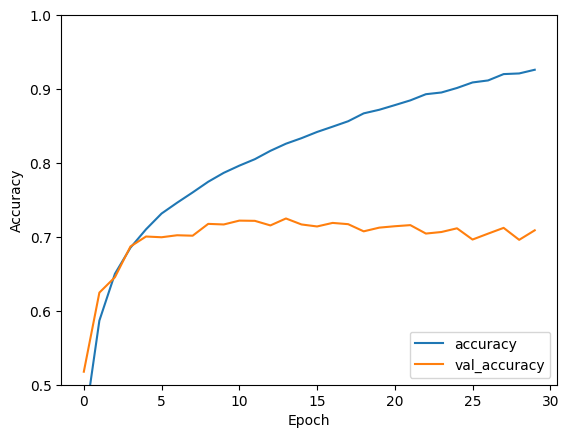

In [ ]:
# Graficamos la precisión del modelo en entrenamiento y validación durante las épocas
plt.plot(history.history['accuracy'], label='accuracy')  # Precisión en el conjunto de entrenamiento
plt.plot(history.history['val_accuracy'], label='val_accuracy')  # Precisión en el conjunto de validación
plt.xlabel('Epoch')  # Etiqueta para el eje X (épocas)
plt.ylabel('Accuracy')  # Etiqueta para el eje Y (precisión)
plt.ylim([0.5, 1])  # Establecemos los límites del eje Y para visualizar mejor los valores de precisión
plt.legend(loc='lower right')  # Añadimos una leyenda en la esquina inferior derecha

# Evaluamos el modelo en el conjunto de prueba para obtener la pérdida y la precisión final
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)


# Imprimir la Precisión del Conjunto de Prueba

En esta celda, imprimimos la precisión final del modelo en el conjunto de prueba para ver qué tan bien ha generalizado el modelo a datos no vistos durante el entrenamiento.

In [ ]:
print(test_acc)

0.708899974822998


# Predecir una imagen de un bus de metrolinea

Primero, cargamos la imagen, la mostramos

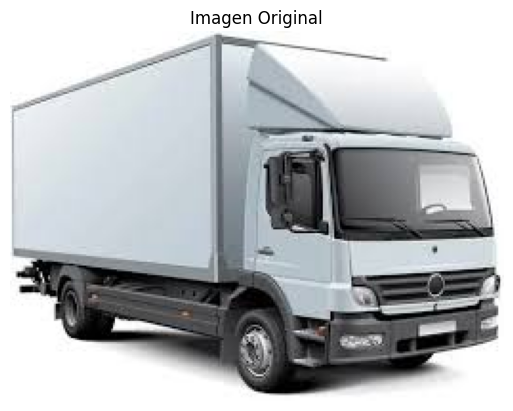

In [ ]:
import requests
from io import BytesIO
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

# Cargar la imagen desde la URL
#url = "https://github.com/adiacla/bigdata/blob/master/metrolinea.jpg?raw=true"
url="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQqAIdpSgPeWh4_R8BGrXPZ6be-nSH4wTykmg&s"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar la imagen cargada
plt.imshow(img)
plt.title('Imagen Original')
plt.axis('off')
plt.show()


#Redimensionar la Imagen para Adaptarla al Tamaño del Modelo

Como mencionamos antes, el modelo fue entrenado con imágenes de 32x32 píxeles. Ahora redimensionamos la imagen cargada para que tenga ese tamaño:

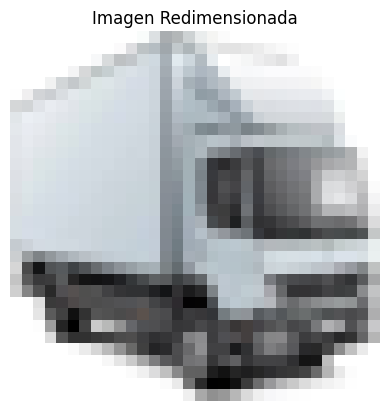

In [ ]:
# Redimensionar la imagen al tamaño de entrada que se usó para entrenar el modelo (32x32 píxeles)
img_resized = img.resize((32, 32))

# Mostrar la imagen redimensionada
plt.imshow(img_resized)
plt.title('Imagen Redimensionada')
plt.axis('off')
plt.show()


#Preprocesar la Imagen (Normalizar y Ajustar las Dimensiones)

Una vez redimensionada, necesitamos convertir la imagen a un arreglo NumPy, normalizarla, y añadir la dimensión para que sea compatible con el modelo:

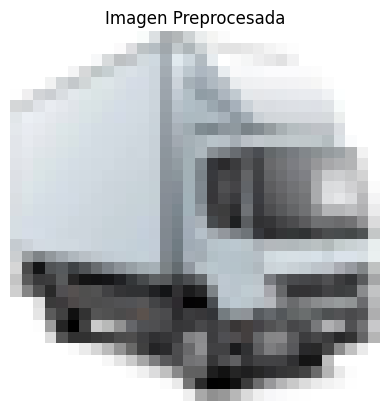

In [ ]:
import numpy as np

# Convertir la imagen redimensionada a un arreglo NumPy
img_array = image.img_to_array(img_resized)

# Normalizar la imagen (dividir entre 255)
img_array = img_array / 255.0

# Añadir una dimensión extra para que la imagen tenga el formato correcto (batch size, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

# Mostrar la imagen preprocesada
plt.imshow(img_array[0])
plt.title('Imagen Preprocesada')
plt.axis('off')
plt.show()


#Realizar la Predicción con el Modelo

Ahora que tenemos la imagen preprocesada, podemos usar el modelo para predecir la clase de la imagen:



In [ ]:
# Realizar la predicción con el modelo entrenado
predictions = model.predict(img_array)

# Imprimir las predicciones
print("Predicciones: ", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicciones:  [[  2.2188594   9.139165  -12.859628   -4.696999  -17.648413  -11.139584
  -13.1707    -18.640339   -9.689937   29.617645 ]]


#Mostrar el Resultado de la Predicción

Finalmente, mostramos el resultado de acuerdo al diccionario de clases (en este caso las clases de CIFAR-10).

In [ ]:
# Diccionario de clases de CIFAR-10
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo',
               'perro', 'rana', 'caballo', 'barco', 'camión o bus']

# Obtener la clase con la mayor probabilidad
predicted_class = np.argmax(predictions)
print("La neurona que tiene el peso mas alto es", predicted_class)
# Mostrar el resultado final
print("La imagen es un(a):", class_names[predicted_class])


La neurona que tiene el peso mas alto es 9
La imagen es un(a): camión o bus


Al completar este taller, habrás aprendido los conceptos clave en el uso de redes neuronales convolucionales (CNN) para tareas de clasificación de imágenes. También habrás ganado experiencia en cómo estructurar un modelo de visión por computadora en Keras, desde la carga y preprocesamiento de los datos, hasta la evaluación y visualización de los resultados.

Es importante destacar que el rendimiento del modelo puede mejorar con ajustes de hiperparámetros, como el número de capas, el tamaño de los filtros y la tasa de aprendizaje. Además, es posible utilizar técnicas de regularización (como Dropout) y aumentación de datos para prevenir el sobreajuste y mejorar la capacidad de generalización del modelo.

Finalmente, este ejercicio es una base sólida para entender cómo funcionan las redes neuronales en el ámbito de la visión por computadora y cómo aplicarlas a problemas del mundo real.

#Persistencia del modelo


Para guardar un modelo entrenado en Keras, tienes varias opciones dependiendo del formato que desees usar. Los dos formatos más comunes son:

El formato nativo de Keras (.keras): Este es el formato más reciente y está optimizado para trabajar con TensorFlow.

El formato HDF5 (.h5): Este es el formato más tradicional y compatible con otras plataformas.
A continuación, te explico cómo puedes guardar el modelo usando ambas opciones:

Guardar el Modelo en el Formato Nativo de Keras

Este es el formato más reciente y preferido en TensorFlow, que guarda el modelo en un único archivo.

In [ ]:
# Guardar el modelo en el formato nativo de Keras
model.save('imagenesCNN1.keras')


Guardar el Modelo en el Formato HDF5

Si prefieres usar el formato .h5, que es más antiguo pero aún ampliamente utilizado, puedes hacerlo de la siguiente manera:

In [ ]:
# Guardar el modelo en formato HDF5 (.h5)
model.save('imagenesCNN1.h5')


##Cargar el Modelo Guardado?

Para cargar el modelo que guardaste en cualquiera de los dos formatos, puedes usar keras.models.load_model():

In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo guardado en formato .keras
modelo_cargado = load_model('imagenesCNN1.keras')

# O cargar el modelo guardado en formato .h5
# modelo_cargado = load_model('imagenesCNN1.h5')

#Guardar la Arquitectura del Modelo en Formato JSON



In [ ]:
model_json = model.to_json()  # Convierte el modelo a una representación JSON

# Guardar la arquitectura en un archivo .json
with open('imagenesCNN1.h5', 'w') as json_file:
    json_file.write(model_json)

In [ ]:

#guardar los pesos del formato h5 del modelo entrenado
model.save_weights('imagenesCNN1.weights.h5') # Changed the filename to include .weights.h5


In [ ]:

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to a file
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)


Saved artifact at '/tmp/tmp1zvxlb76'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132054530632848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132052541566672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132052541556496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132052540889552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132052540892816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132052540893584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132052541562448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132052541561296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132052541562832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132052541562640: TensorSpec(shape=(), dtype=tf.resource, name=None)
